Some typical NumPy 'random' functions:

In [ ]:
import numpy as np

# To generate a random float values between 0 and 1 (exclusive)
print(np.random.rand(3, 2)) # Creates a 3 x 2 matrix of random float values between 0 and 1 (exclusive)

# To generate random float values from standard normal distribution (mean = 0 and std = 1)
print(np.random.randn(5)) # Generates 5 random float values from standard normal distribution

# To generate random integer values within a range of values
print(np.random.randint(1, 100, 10)) # Generates 10 random integer values between 1 and 100 (exclusive)

# To randomly select an element from a given list of elements
print(np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9], size=3)) # Three random numbers from the given array will be chosen

# To generate a random sample of values from a normally distributed with a specified mean and standard deviation
print(np.random.normal(loc=0, scale=1, size=10)) # 10 random values will be generated from a normally distributed data where 0 (loc) is the mean and 1 (scale) is the standard deviation

# To set a seed for a random number generation to ensure you get the same results later as well
print(np.random.seed(42)) # This ensures that any random numbers generated in the program are same every time you run the program. The seed value '42' can be any other value

AIM #1: Generate a very large dataset
1. Generate a dataset of 1 million random data items between 1 and 100 items using only pandas
2. Generate a dataset of 1 million random data items between 1 and 100 using only NumPy
3. Calculate the time it takes for both the above operations. 
    3.1. Import the 'time' module, and use the time() function to calculate current time
    3.2. Which one is faster and why?

In [2]:
# Write your code for AIM #1 here
import pandas as pd
import numpy as np
import time

start_time_pd = time.time()
data_pd = pd.DataFrame(np.random.randint(1, 101, size=(1000000, 1)), columns=['Random Numbers'])
time_pd = time.time() - start_time_pd

start_time_np = time.time()
data_np = np.random.randint(1, 101, size=1000000)
time_np = time.time() - start_time_np

print(f"Pandas time: {time_pd:.5f} seconds")
print(f"NumPy time: {time_np:.5f} seconds")

if time_pd < time_np:
    print("Pandas is faster.")
else:
    print("NumPy is faster.")



Pandas time: 0.00871 seconds
NumPy time: 0.00592 seconds
NumPy is faster.


AIM #2: Basic statistics
For the given dataset on sleep health and lifestyle, do the following
1. Using only pandas, load the dataset, calculate mean 'Sleep Duration', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Heart Rate' and 'Daily Steps'.
2. Do the same as in Step 1 using only NumPy
3. Using only pandas, first calculate correlation (across only the numerical variables), and then separate correlation between...
    Sleep duration and Age
    Sleep duration and Heart rate
    Sleep duration and Daily steps
4. Using only NumPy, do the same as Step 3
5. Using pandas only, calculate standard deviation for 'Sleep Duration'. 
6. Usiong NumPy only, calculate standard deviation for 'Sleep Duration'. 
7. Calculate the time difference between using pandas and NumPy, right from the step of loading the dataset to the final standard deviation step. 
    5.1. Which one is faster and why?

In [8]:
import numpy as np
import pandas as pd
import time

data = pd.read_csv('sleep_health.csv')
data.columns = data.columns.str.strip()

print(data.columns) 

try:
    age = data['Age'].astype(int)
    sleep_duration = data['Sleep Duration'].astype(float)
    systolic_bp = data['Systolic blood pressure'].astype(float)
    diastolic_bp = data['Diastolic blood pressure'].astype(float)
    heart_rate = data['Heart Rate'].astype(float)
    daily_steps = data['Daily Steps'].astype(float)

    start_time_np_mean = time.time()
    mean_np = np.array([
        np.mean(sleep_duration), 
        np.mean(systolic_bp), 
        np.mean(diastolic_bp), 
        np.mean(heart_rate), 
        np.mean(daily_steps)
    ])
    time_np_mean = time.time() - start_time_np_mean

    start_time_np_corr = time.time()
    corr_matrix = np.corrcoef([sleep_duration, age, heart_rate, daily_steps])
    sleep_age_corr_np = corr_matrix[0, 1]
    sleep_heart_corr_np = corr_matrix[0, 2]
    sleep_steps_corr_np = corr_matrix[0, 3]
    time_np_corr = time.time() - start_time_np_corr

    start_time_np_std = time.time()
    std_np = np.std(sleep_duration)
    time_np_std = time.time() - start_time_np_std

    print(f"Mean: {mean_np}")
    print(f"Sleep Duration and Age correlation: {sleep_age_corr_np:.5f}")
    print(f"Sleep Duration and Heart Rate correlation: {sleep_heart_corr_np:.5f}")
    print(f"Sleep Duration and Daily Steps correlation: {sleep_steps_corr_np:.5f}")
    print(f"Standard Deviation of Sleep Duration: {std_np:.5f}")
    print(f"Mean calculation time: {time_np_mean:.5f} seconds")
    print(f"Correlation calculation time: {time_np_corr:.5f} seconds")
    print(f"Standard Deviation calculation time: {time_np_std:.5f} seconds")
except KeyError as e:
    print(f"KeyError: {e}. Check that the column names are correct.")


Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Systolic blood pressure', 'Diastolic blood pressure',
       'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')
Mean: [   7.13208556  128.55347594   84.64973262   70.1657754  6816.84491979]
Sleep Duration and Age correlation: 0.34471
Sleep Duration and Heart Rate correlation: -0.51645
Sleep Duration and Daily Steps correlation: -0.03953
Standard Deviation of Sleep Duration: 0.79459
Mean calculation time: 0.00100 seconds
Correlation calculation time: 0.00000 seconds
Standard Deviation calculation time: 0.00000 seconds


AIM #3: Use suitable plots to visualize the data

1. Using only pandas (and matplotlib/seaborn if necessary) plot the distribution for
    1.1. Age
    1.2. Sleep Duration
    1.3. Quality of Sleep
    1.4. Physical Activity Level
    1.5. Stress Level
    1.6. Heart Rate
2. Using only NumPy, do the same as Step 1. You will need matplotlib for this
3. Using only pandas, use the appropriate plot to
    3.1. See the distribution of 'Sleep Duration' based on 'Quality of Sleep'
    3.2. See the distribution of 'Sleep Duration' based on 'Stress Level'
    3.3. See the distribution of 'Sleep Duration' based on 'Physical Activity Level'
    3.4. See the distribution of 'Sleep Duration' based on 'Occupation'
    3.5. See the distribution of 'Sleep Duration' based on 'BMI'
4. Using only NumPy, do the same as Step 3. You will need matplotlib for this
5. Using only pandas, use a suitable plot to see the relation between
    5.1. Age and Sleep Duration
    5.2. Sleep Duration and Heart Rate
    5.3. Heart Rate and Daily Steps
    5.4. Sleep Duration and Daily Steps
6. Using only NumPy, do the same as Step 5. You will need matplotlib for this 
7. Find the time difference between plotting using only pandas, and plotting using NumPy

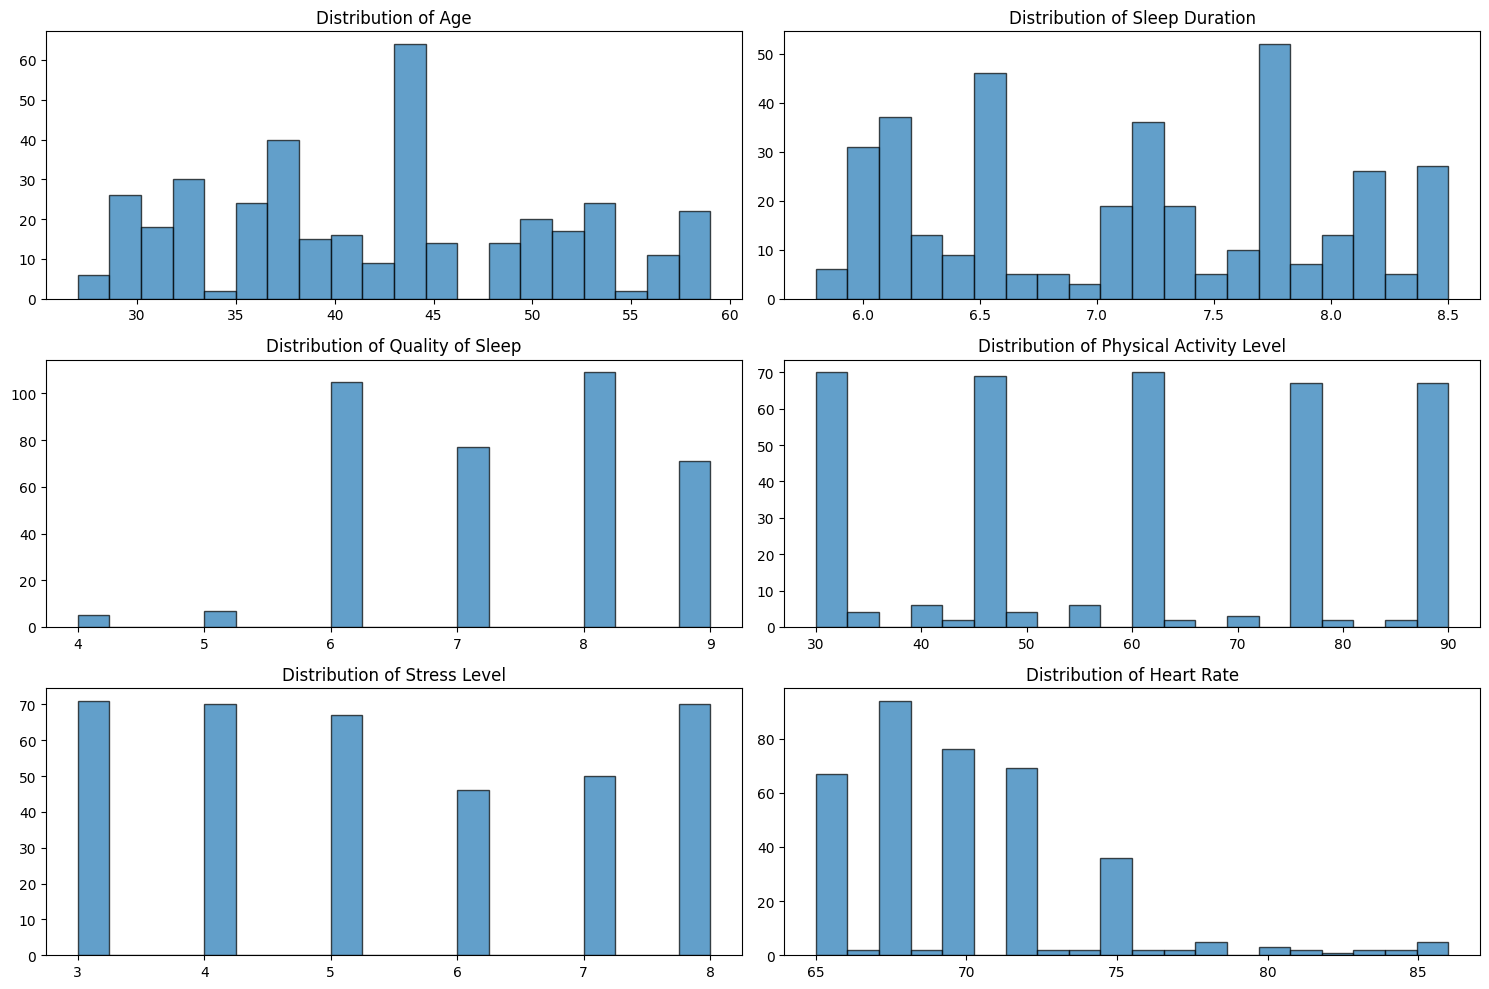

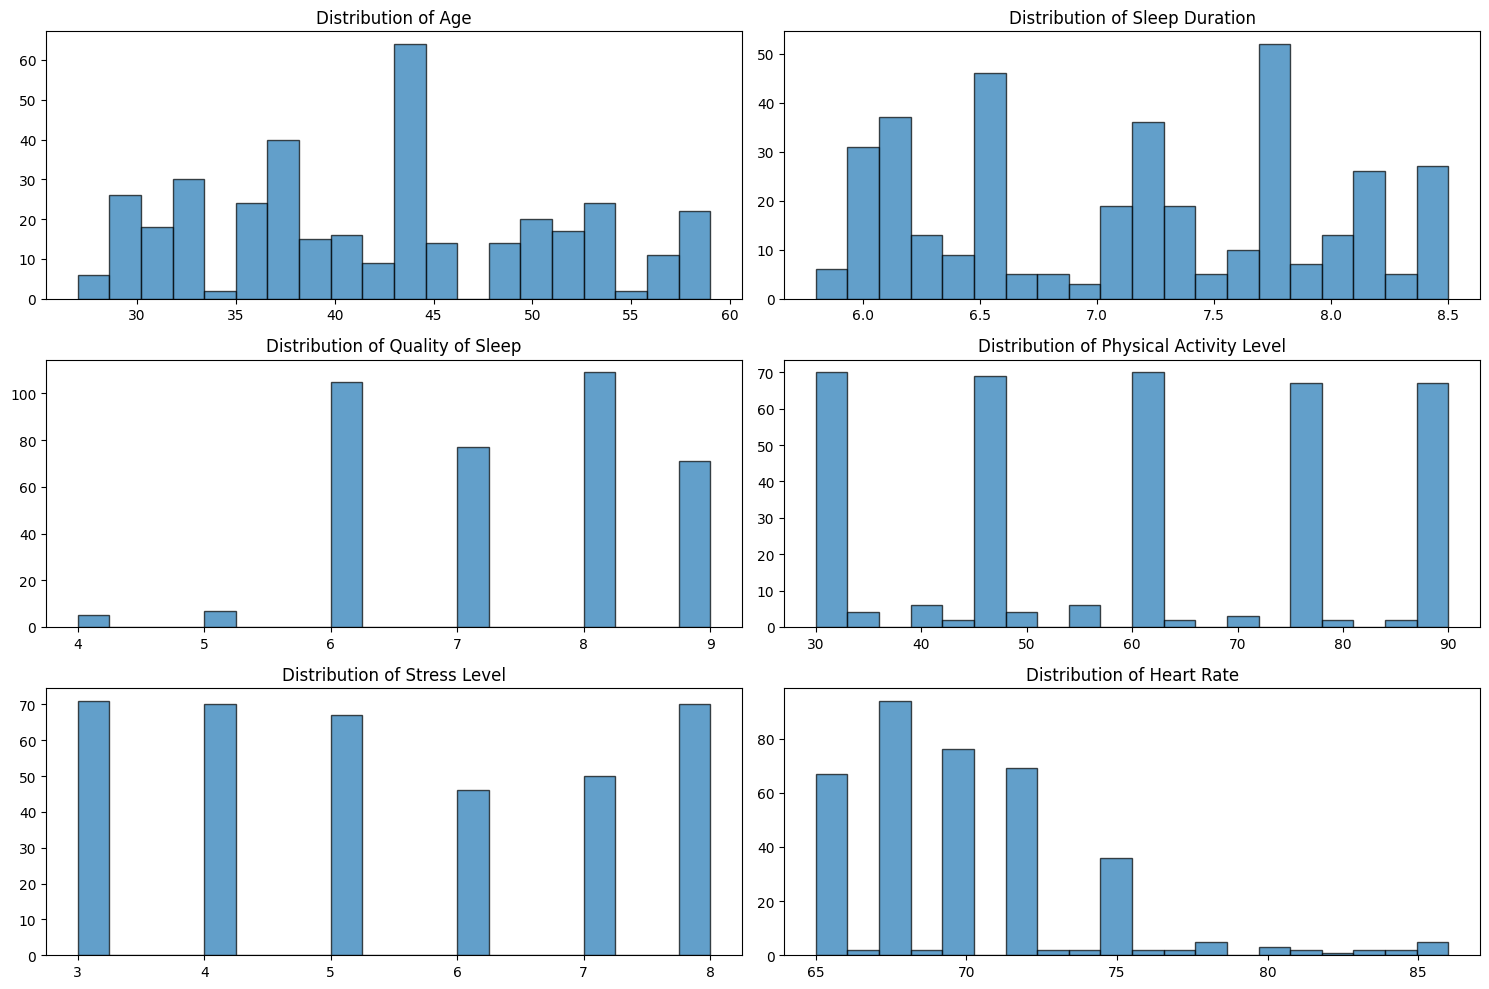

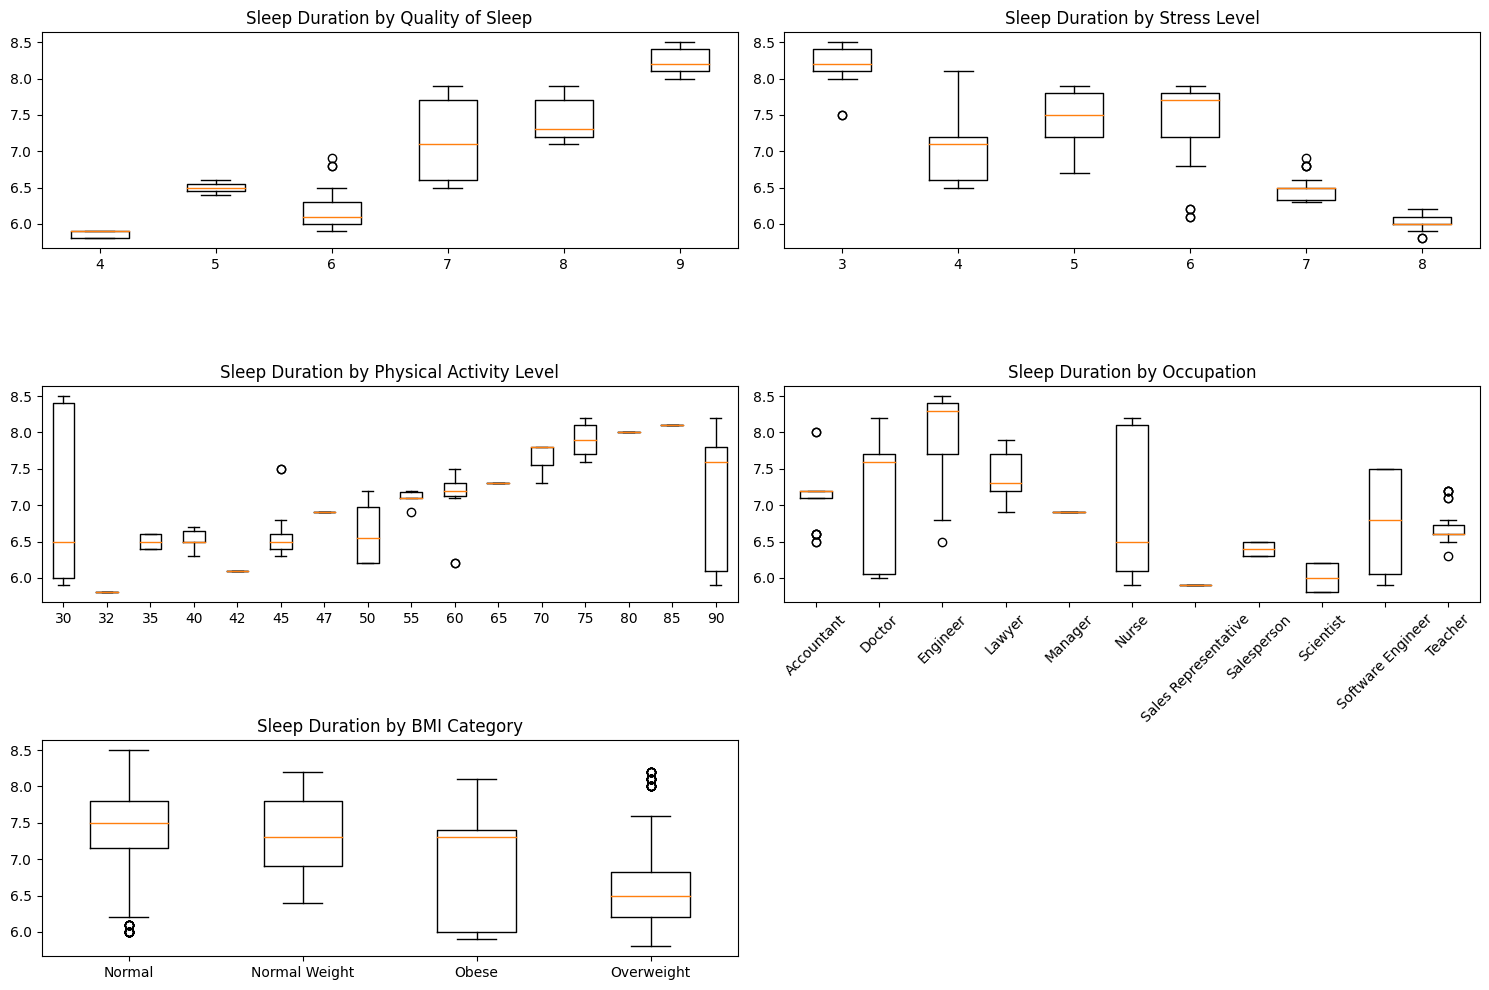

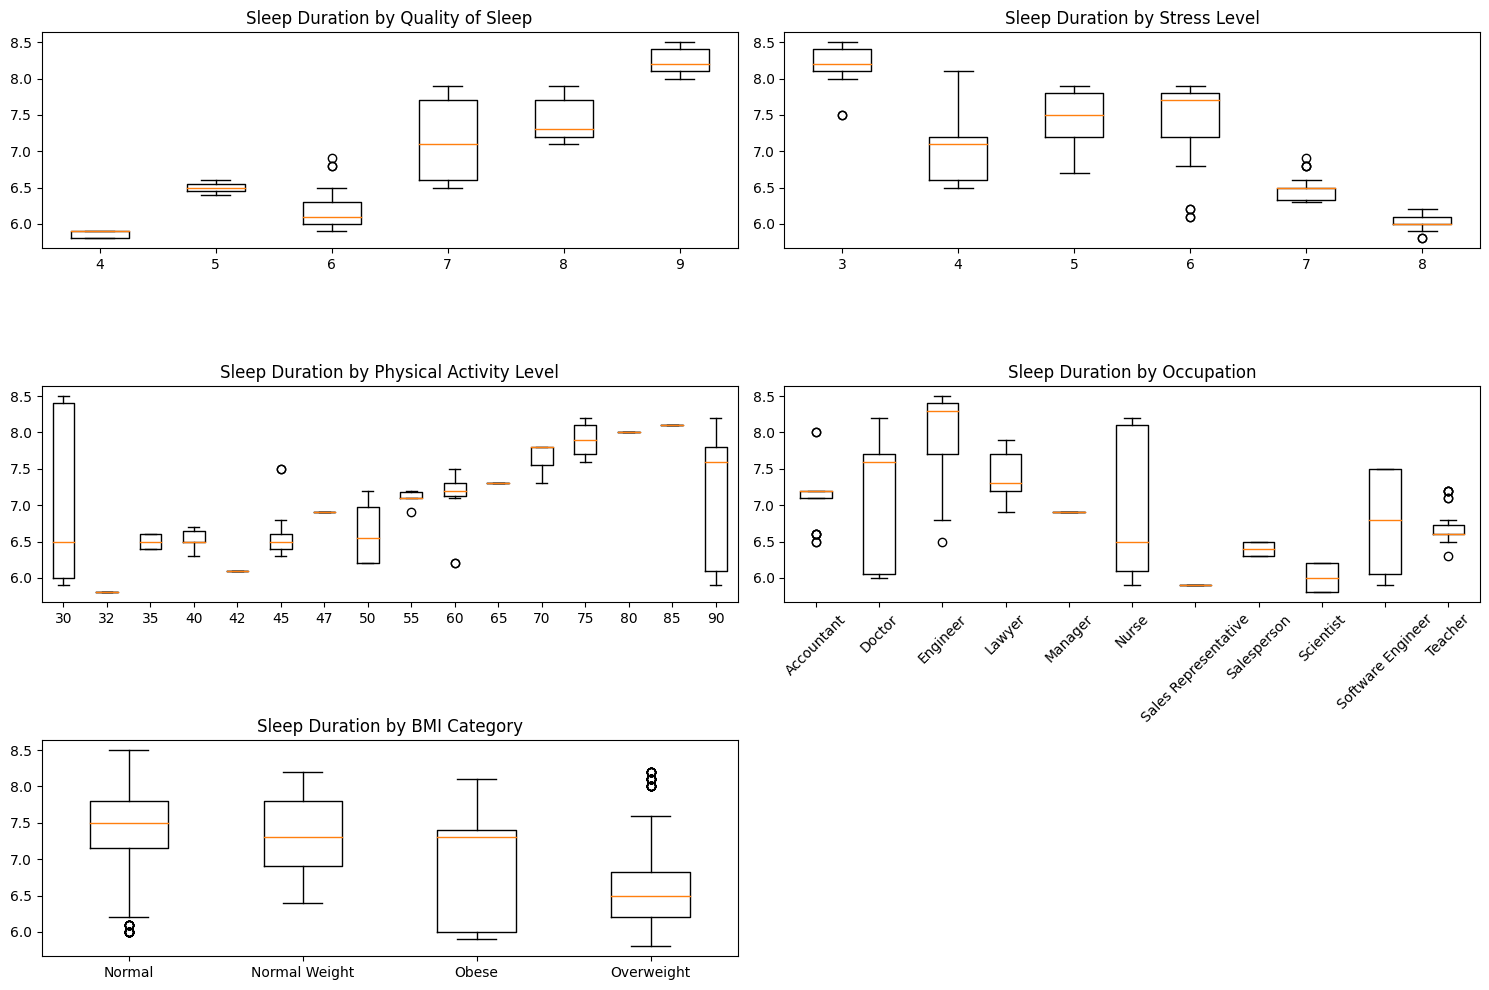

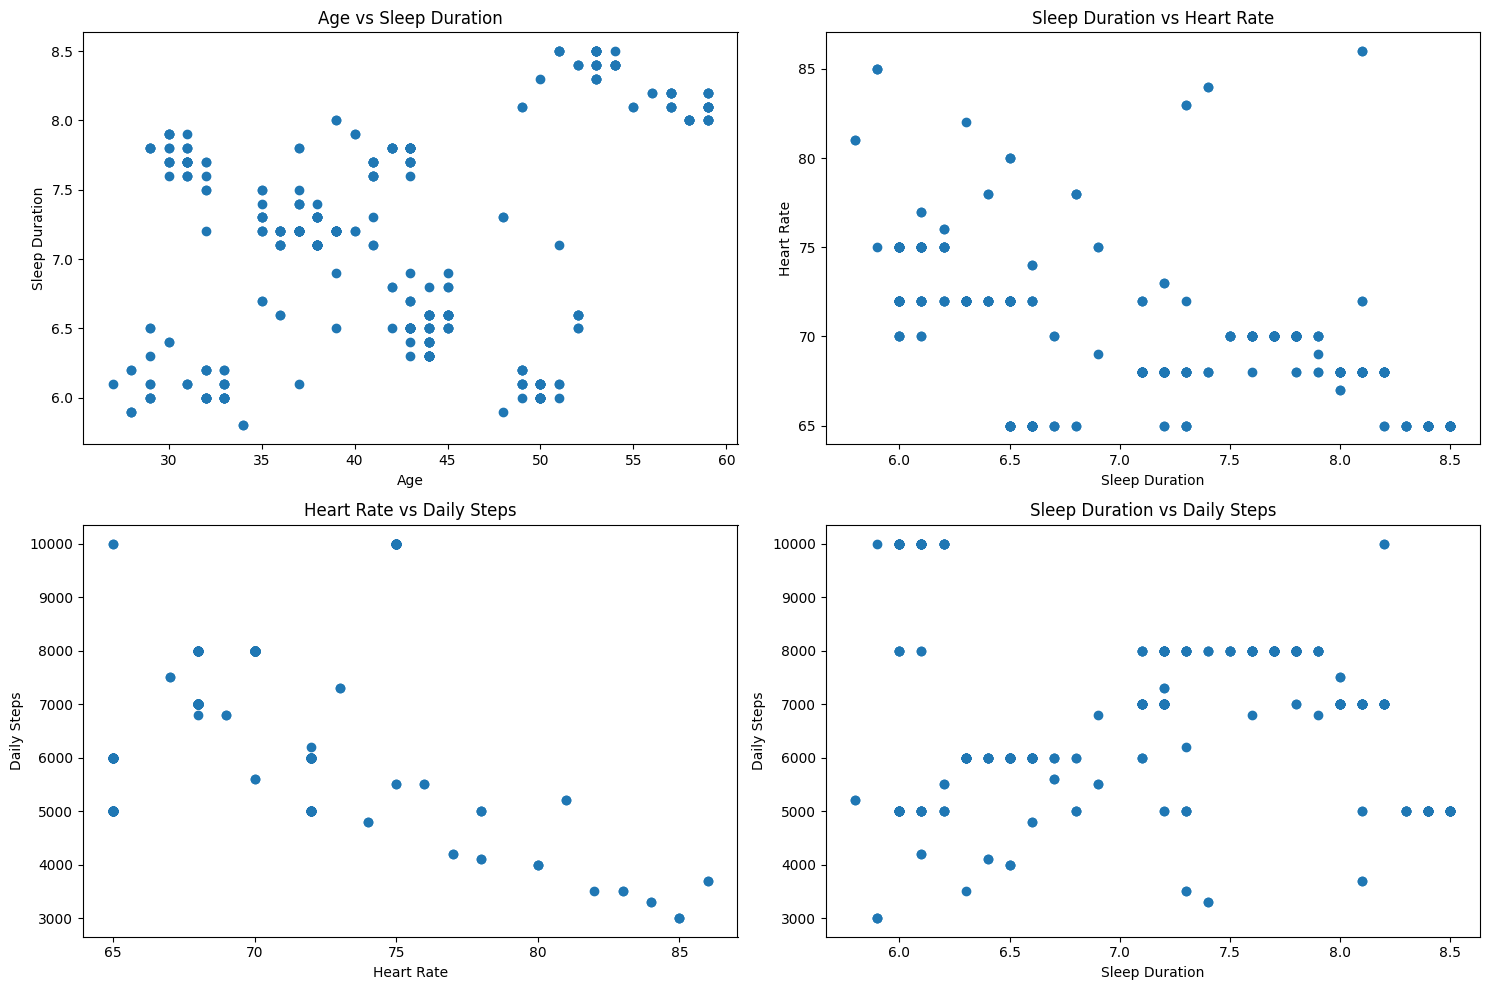

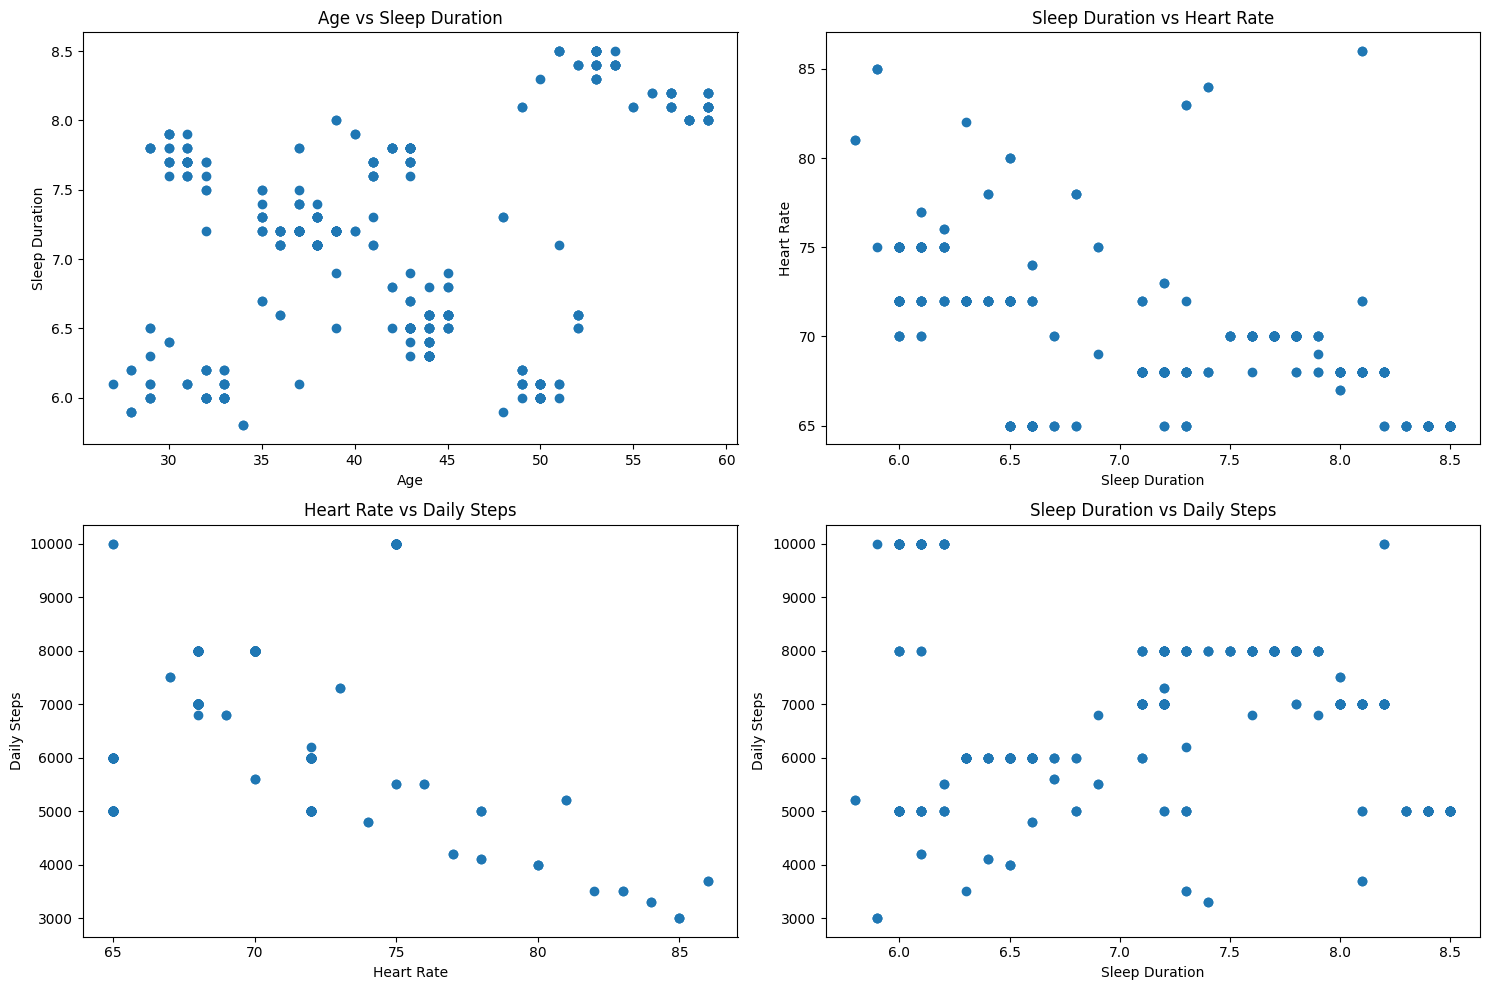

Pandas plotting time: 1.0337 seconds
NumPy plotting time: 1.0794 seconds


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

data = pd.read_csv('sleep_health.csv')
data.columns = data.columns.str.strip()

start_time_pandas = time.time()
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.hist(data['Age'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Age')

plt.subplot(3, 2, 2)
plt.hist(data['Sleep Duration'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Sleep Duration')

plt.subplot(3, 2, 3)
plt.hist(data['Quality of Sleep'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Quality of Sleep')

plt.subplot(3, 2, 4)
plt.hist(data['Physical Activity Level'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Physical Activity Level')

plt.subplot(3, 2, 5)
plt.hist(data['Stress Level'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Stress Level')

plt.subplot(3, 2, 6)
plt.hist(data['Heart Rate'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Heart Rate')

plt.tight_layout()
plt.show()
time_pandas_plot = time.time() - start_time_pandas

start_time_numpy = time.time()
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.hist(data['Age'].to_numpy(), bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Age')

plt.subplot(3, 2, 2)
plt.hist(data['Sleep Duration'].to_numpy(), bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Sleep Duration')

plt.subplot(3, 2, 3)
plt.hist(data['Quality of Sleep'].to_numpy(), bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Quality of Sleep')

plt.subplot(3, 2, 4)
plt.hist(data['Physical Activity Level'].to_numpy(), bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Physical Activity Level')

plt.subplot(3, 2, 5)
plt.hist(data['Stress Level'].to_numpy(), bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Stress Level')

plt.subplot(3, 2, 6)
plt.hist(data['Heart Rate'].to_numpy(), bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribution of Heart Rate')

plt.tight_layout()
plt.show()
time_numpy_plot = time.time() - start_time_numpy

plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
quality_sleep = data['Quality of Sleep']
plt.boxplot([data['Sleep Duration'][quality_sleep == q] for q in np.unique(quality_sleep)],
            labels=np.unique(quality_sleep))
plt.title('Sleep Duration by Quality of Sleep')

plt.subplot(3, 2, 2)
stress_level = data['Stress Level']
plt.boxplot([data['Sleep Duration'][stress_level == s] for s in np.unique(stress_level)],
            labels=np.unique(stress_level))
plt.title('Sleep Duration by Stress Level')

plt.subplot(3, 2, 3)
activity_level = data['Physical Activity Level']
plt.boxplot([data['Sleep Duration'][activity_level == a] for a in np.unique(activity_level)],
            labels=np.unique(activity_level))
plt.title('Sleep Duration by Physical Activity Level')

plt.subplot(3, 2, 4)
occupation = data['Occupation']
plt.boxplot([data['Sleep Duration'][occupation == o] for o in np.unique(occupation)],
            labels=np.unique(occupation))
plt.title('Sleep Duration by Occupation')
plt.xticks(rotation=45)

plt.subplot(3, 2, 5)
bmi_category = data['BMI Category']
plt.boxplot([data['Sleep Duration'][bmi_category == b] for b in np.unique(bmi_category)],
            labels=np.unique(bmi_category))
plt.title('Sleep Duration by BMI Category')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
sleep_duration_np = data['Sleep Duration'].to_numpy()
quality_np = data['Quality of Sleep'].to_numpy()
plt.boxplot([sleep_duration_np[quality_np == q] for q in np.unique(quality_np)], labels=np.unique(quality_np))
plt.title('Sleep Duration by Quality of Sleep')

plt.subplot(3, 2, 2)
stress_np = data['Stress Level'].to_numpy()
plt.boxplot([sleep_duration_np[stress_np == s] for s in np.unique(stress_np)], labels=np.unique(stress_np))
plt.title('Sleep Duration by Stress Level')

plt.subplot(3, 2, 3)
activity_np = data['Physical Activity Level'].to_numpy()
plt.boxplot([sleep_duration_np[activity_np == a] for a in np.unique(activity_np)], labels=np.unique(activity_np))
plt.title('Sleep Duration by Physical Activity Level')

plt.subplot(3, 2, 4)
occupation_np = data['Occupation'].to_numpy()
plt.boxplot([sleep_duration_np[occupation_np == o] for o in np.unique(occupation_np)], labels=np.unique(occupation_np))
plt.title('Sleep Duration by Occupation')
plt.xticks(rotation=45)

plt.subplot(3, 2, 5)
bmi_np = data['BMI Category'].to_numpy()
plt.boxplot([sleep_duration_np[bmi_np == b] for b in np.unique(bmi_np)], labels=np.unique(bmi_np))
plt.title('Sleep Duration by BMI Category')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(data['Age'], data['Sleep Duration'])
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')

plt.subplot(2, 2, 2)
plt.scatter(data['Sleep Duration'], data['Heart Rate'])
plt.title('Sleep Duration vs Heart Rate')
plt.xlabel('Sleep Duration')
plt.ylabel('Heart Rate')

plt.subplot(2, 2, 3)
plt.scatter(data['Heart Rate'], data['Daily Steps'])
plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate')
plt.ylabel('Daily Steps')

plt.subplot(2, 2, 4)
plt.scatter(data['Sleep Duration'], data['Daily Steps'])
plt.title('Sleep Duration vs Daily Steps')
plt.xlabel('Sleep Duration')
plt.ylabel('Daily Steps')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
age_np = data['Age'].to_numpy()
plt.scatter(age_np, sleep_duration_np)
plt.title('Age vs Sleep Duration')
plt.xlabel('Age')
plt.ylabel('Sleep Duration')

plt.subplot(2, 2, 2)
heart_rate_np = data['Heart Rate'].to_numpy()
plt.scatter(sleep_duration_np, heart_rate_np)
plt.title('Sleep Duration vs Heart Rate')
plt.xlabel('Sleep Duration')
plt.ylabel('Heart Rate')

plt.subplot(2, 2, 3)
daily_steps_np = data['Daily Steps'].to_numpy()
plt.scatter(heart_rate_np, daily_steps_np)
plt.title('Heart Rate vs Daily Steps')
plt.xlabel('Heart Rate')
plt.ylabel('Daily Steps')

plt.subplot(2, 2, 4)
plt.scatter(sleep_duration_np, daily_steps_np)
plt.title('Sleep Duration vs Daily Steps')
plt.xlabel('Sleep Duration')
plt.ylabel('Daily Steps')

plt.tight_layout()
plt.show()

print(f"Pandas plotting time: {time_pandas_plot:.4f} seconds")
print(f"NumPy plotting time: {time_numpy_plot:.4f} seconds")


AIM #4: Other possible plotting

1. Think of other possible plots to show some interesting distribution and relations. Do this using both pandas and NumPy



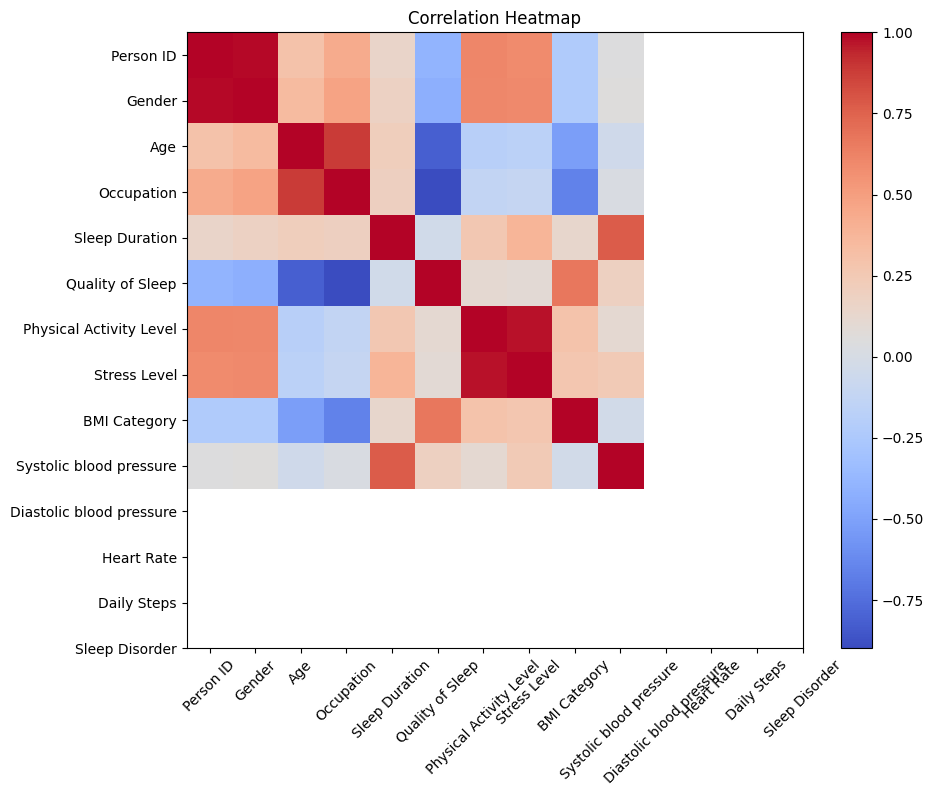

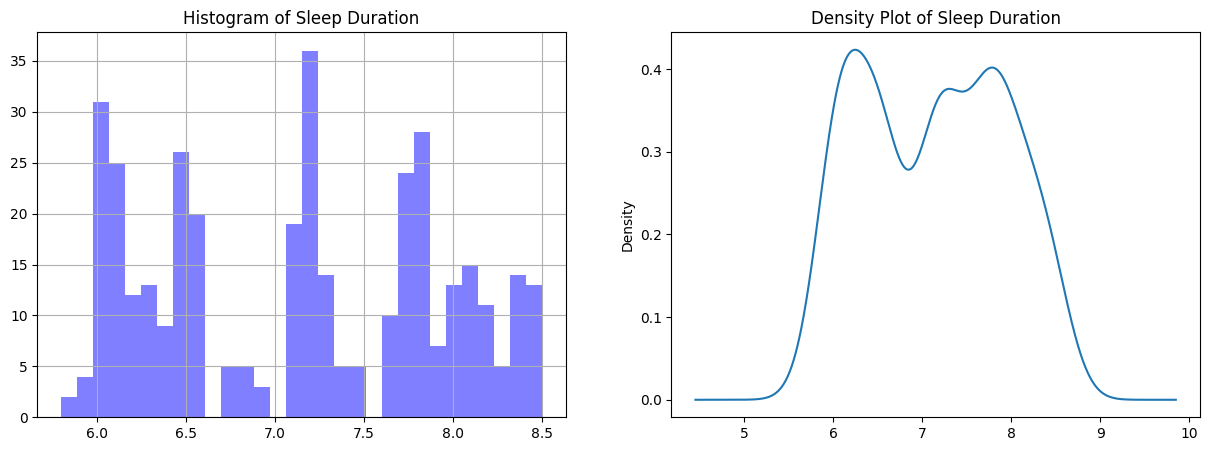

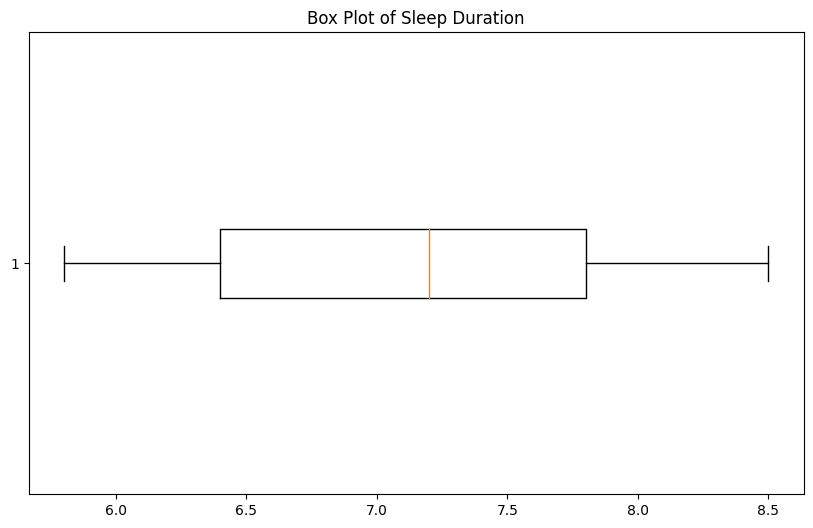

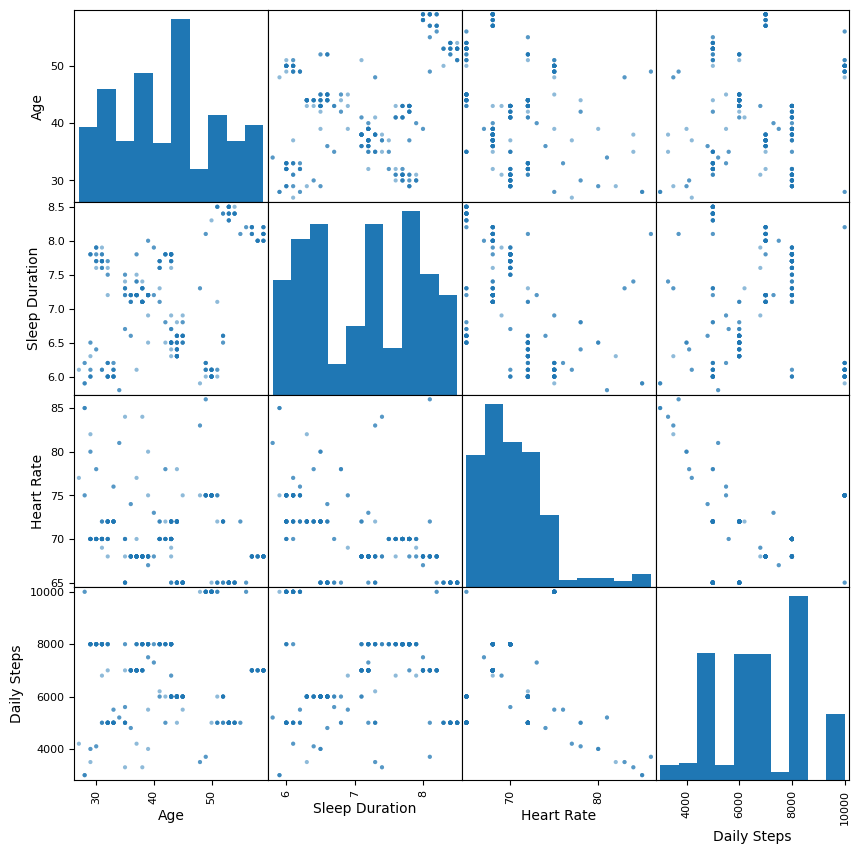

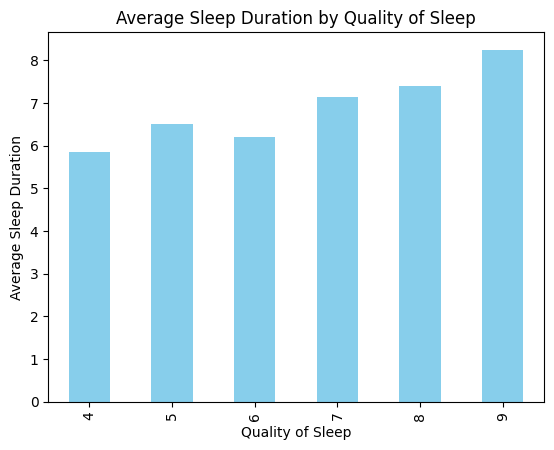

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('sleep_health.csv')
data.columns = data.columns.str.strip()

plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title('Correlation Heatmap')
plt.xticks(range(len(data.columns)), data.columns, rotation=45)
plt.yticks(range(len(data.columns)), data.columns)
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
data['Sleep Duration'].hist(bins=30, alpha=0.5, color='blue')
plt.title('Histogram of Sleep Duration')
plt.subplot(1, 2, 2)
data['Sleep Duration'].plot(kind='density')
plt.title('Density Plot of Sleep Duration')
plt.show()

plt.figure(figsize=(10, 6))
plt.boxplot(data['Sleep Duration'], vert=False)
plt.title('Box Plot of Sleep Duration')
plt.show()

pd.plotting.scatter_matrix(data[['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps']], figsize=(10, 10))
plt.show()

grouped_data = data.groupby('Quality of Sleep')['Sleep Duration'].mean()
grouped_data.plot(kind='bar', color='skyblue')
plt.title('Average Sleep Duration by Quality of Sleep')
plt.ylabel('Average Sleep Duration')
plt.show()

data_np = data.to_numpy()
corr_matrix_np = np.corrcoef(data_np[:, [2, 4, 11, 12, 13]].T)
plt.imshow(corr_matrix_np, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps'])), ['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps'])
plt.yticks(range(len(['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps'])), ['Age', 'Sleep Duration', 'Heart Rate', 'Daily Steps'])
plt.title('Correlation Heatmap (NumPy)')
plt.show()
